___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# PRIMER EXÁMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Examen Tema 1
## Nombre:Esteban Márquez Delgado

## Fecha: 28 de septiembre del 2021

## Por: Oscar David Jaramillo Z.

### Responde los siguientes cuestionamientos usando al menos 10000 simulaciones

## 1. Un juego de lanzamiento de una moneda (5 puntos)

Al ingresar al casino, descubres que, además de los juegos habituales (blackjack, ruleta, etc.), ofrecen un nuevo juego interesante con las siguientes reglas.
Reglas del juego.
- Cada jugada del juego consiste en **lanzar repetidamente una moneda** imparcial **hasta que la diferencia** entre el número de caras lanzadas y el número de sellos **es 3**.
- Si decides jugar el juego, debes pagar **$ \$ 1 $ por cada lanzamiento** de la moneda. **No puedes salir durante una jugada** del juego.
- Usted **recibe $\$8 $ al final de cada uno de los juegos**.

Por lo tanto, **ganas dinero si el número de lanzamientos** requeridos es **menor a 8**, pero pierdes dinero si se requieren más de 8 lanzamientos.

In [2]:
# Importación de paquetes
import numpy as np
import random
#Función para la producción de valores igualmente distribuidos
from random import randrange 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [6]:
def juego_moneda(cap_inicial, apuesta, n_juegos, premio, inicio):
    capital = np.zeros(n_juegos) #Vectores de ceros para su llenado
    heads = np.zeros(n_juegos)#Todos comenzarán de 0 y para ello se establece en la función
    tails = np.zeros(n_juegos)#Las ocurrencias se reiniciarán 
    diff = np.zeros(n_juegos)#Cuando la diferencia entre el número de caras y sellos sea 3
    juegos=np.zeros(n_juegos)
    capital[0] = cap_inicial #Capital inicial
    heads[0] = inicio #Ocurrencias al inicializar 
    tails[0] = inicio #Iguales a 0
    diff[0] = inicio #0
    juegos[0] = inicio #0
    
    def fill_vector(i):
        nonlocal capital #nonlocal para trabajar con nuestros arreglos no internos a la función
        nonlocal heads 
        nonlocal tails
        nonlocal diff
        nonlocal juegos
        
        if randrange(2) == 0: #Lanzamiento de moneda igual a 0 o 1 con función para valores equiprobables.
            heads[i+1] = heads[i] + 1 #Registro si obtenemos cara
            tails[i+1] = tails[i] #Sello constante
            diff[i+1]=abs(tails[i+1]-heads[i+1]) #Registro de diferencias
            juegos[i+1]=juegos[i]
        else: 
            tails[i+1] = tails[i] + 1 #Registro si obtenemos sello
            heads[i+1] = heads[i] #Cara constante
            diff[i+1]=abs(tails[i+1]-heads[i+1]) #Registro de diferencias
            juegos[i+1]=juegos[i]
                
        if diff[i] < 3: #Cuando la diferencia entre C/S es menor a 3
                capital[i + 1] = capital[i] - apuesta #Perdemos la apuesta ($1)
                
        if diff[i] == 3: #Cuando la diferencia entre C/S es igual a 3
                capital[i + 1] = capital[i] + premio #Ganamos el premio ($8)
                diff[i+1] = inicio #Reiniciamos diferencias
                heads[i+1] = inicio #Caras
                tails[i+1] = inicio #Y sellos
                juegos[i+1]=juegos[i]+1
                
    [fill_vector(i) for i in range(n_juegos - 1)] #Llenado de capital cuyo valor no se reinicia.
    return juegos

n=10000 #n simulaciones
juegos=juego_moneda(0,1,10001,8,0) #Número de juegos deseado +1
juegos_arr = np.array([juego_moneda(0,1,101,8,0) for i in range(n)]) #Simulaciones de x juegos
#Tiempo de ejecución: 4.22s, 10000 simulaciones y 10000 simulaciones de 100 juegos (juegos_arr1)

*Con el juego planteado anteriormente, responda las siguientes preguntas:*

1. ¿Cuál es el **promedio de tiradas hasta que termina un juego?** ¿Cuál es su **desviación estándar?** (dibuja su **histograma)**.

**(Respuesta 1: promedio de tiradas)**

In [7]:
print('El promedio de lanzamientos hasta que un juego termine es de =',round((juegos.shape/(juegos+1))[-1],2))

El promedio de lanzamientos hasta que un juego termine es de = 10.14


**(Respuesta 1: desv. std.)**

In [5]:
print('La desviación estándar del número de juegos hasta que este termina es de σ =',round(juegos.std(),2))

La desviación estándar del número de juegos hasta que este termina es de σ = 293.7


**(Complemento de Respuesta 1: Gráfico.)**

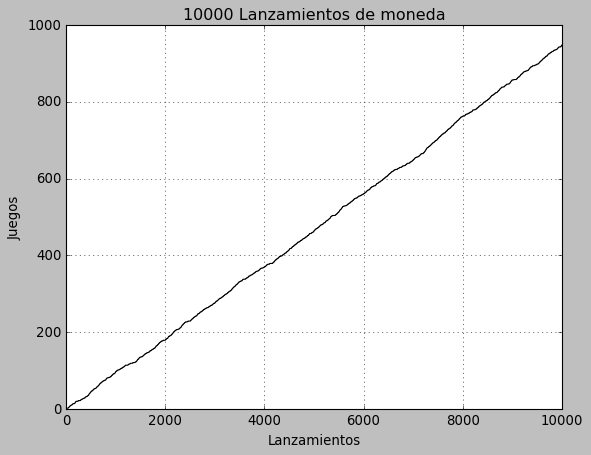

In [157]:
#Curiosidad..
#Útil para evaluar la relación de juegos, lanzamientos, costo de lanzamiento y premio..
plt.style.use('classic') #Comportamiento gráfico
plt.plot(juegos, color='black') 
plt.title('10000 Lanzamientos de moneda')
plt.xlabel('Lanzamientos')
plt.ylabel('Juegos')
plt.grid()
plt.show()

Mediante el gráfico anterior podemos comprobar que el promedio de lanzamientos efectivamente es 9.98 porque para 10,000 simulaciones se tiene ≈ 1000 juegos (1001), igualmente comprobable accediendo al último valor del arreglo que retorna la función **juego_moneda** ( *juegos[-1]* ). Esta gráfica nos fue útil para diseñar el juego mientras retornamos la variable *capital* con pocos *n_juegos* para visualizar los juegos en los que se otorgaba el premio. Del mismo modo, hubo que asegurarse que las variables no locales *heads,tails y diff* avanzaran en sus arreglos junto con *n_juegos* pero que permanecieran *constantes* de no verse afectadas por el resultado del lanzamiento en curso.

**(Respuesta 1: Histograma.)**

(array([1.000e+00, 6.300e+01, 5.900e+02, 7.850e+02, 2.924e+03, 3.397e+03,
        1.143e+03, 9.320e+02, 1.520e+02, 1.300e+01]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

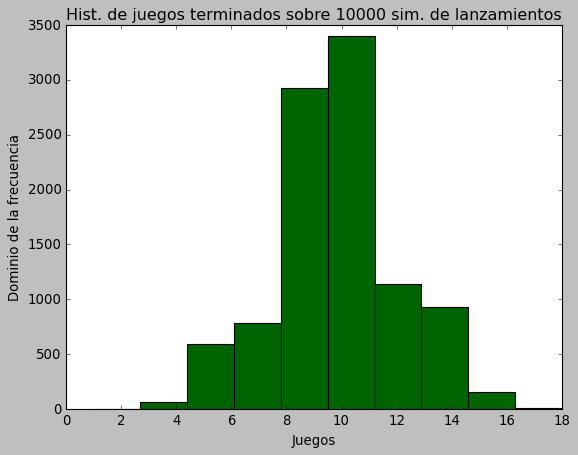

In [158]:
#Mientras el sesgo se acumula a la izquierda el juego no es rentable
plt.title("Hist. de juegos terminados sobre 10000 sim. de lanzamientos")
plt.xlabel('Juegos')
plt.ylabel('Dominio de la frecuencia')
plot_hist=plt.hist((juegos_arr[:n,-1]), color='darkgreen')
plot_hist

2. Para el inciso anterior ¿Cuál es la **probabilidad de que tires más de 10 veces** para terminar un juego? ¿ **y** de que tires **menos de 5 veces**?.

In [125]:
#Porcentaje de número de juegos en 100 lanzamientos con 10000 simulaciones en orden descendente.
df_cantjuegos = pd.DataFrame(juegos_arr) #Convertimos arreglo a df para utilizar la función que retorna el valor con mayor prob.
cant_juegos=df_cantjuegos.iloc[:,-1:].mode() #La moda del número de juegos en el último lanzamiento.
cant_juegos=cant_juegos.values[0] #Regresamos de df a arreglo para poder utilizar len(x)>y ó len(x)<y en la respuesta..
sim_juegos=(df_cantjuegos.iloc[:,-1:].value_counts()/n)*100 #Pero ántes visualizamos la prob. de valores únicos en orden descendente.
df =pd.DataFrame({'10000 simulaciones de 100 juegos %': sim_juegos})
df

,10000 simulaciones de 100 juegos %
100,
10.0,17.92
9.0,17.04
11.0,15.96
8.0,12.80
12.0,11.24
7.0,8.22
13.0,6.26
6.0,3.78
14.0,3.02


Mediante la visualización de la prob. del número de juegos en orden descendente podemos darnos una idea de si el juego es rentable o no. 

Posteriormente se demostrará que no..

**(Respuesta 1.2: Probabilidades.)**

In [159]:
#Para ser más precisos obtenemos la prob. de tirar más de 10 veces y menos de 5.
((len(juegos_arr[:n,-1][juegos_arr[:n,-1]>10])/10000)*100)
print('La prob. de que se tire más de 10 veces es de:',round(((len(juegos_arr[:n,-1][juegos_arr[:n,-1]>10])/10000)*100),2),\
      '%. Por otro lado, la prob. de que se tiré menos de 5 veces es tan solo de:'\
      ,((len(juegos_arr[:n,-1][juegos_arr[:n,-1]<5])/10000)*100),'%. Como dato útil y adicional obtenemos la prob. de perder'\
      ', por ser la cantidad de veces en los que tendríamos que hacer más de 8 lanzamientos, equivalente al:'
      ,round(((len(juegos_arr[:n,-1][juegos_arr[:n,-1]>8])/10000)*100),2),'% de las veces.')

La prob. de que se tire más de 10 veces es de: 38.23 %. Por otro lado, la prob. de que se tiré menos de 5 veces es tan solo de: 0.64 %. Como dato útil y adicional obtenemos la prob. de perder, por ser la cantidad de veces en los que tendríamos que hacer más de 8 lanzamientos, equivalente al: 73.24 % de las veces.


3. **Imagina  que lanzas 100** tiros exactos la moneda. ¿Cuál es tu **valor esperado de \$\$ ganado/perdido**? ¿Y tu **valor más probable**?¿Cuál es la **probabilidad de ganar dinero**? (Grafica el histograma de simulaciones).

In [160]:
#Se utiliza la misma función pero que RETORNE CAPITAL EN VEZ DE # de JUEGOS jugados.
def juego_moneda(cap_inicial, apuesta, n_juegos, premio, inicio):
    capital = np.zeros(n_juegos) #Vectores de ceros para su llenado
    heads = np.zeros(n_juegos)#Todos comenzarán de 0 y para ello se establece en la función
    tails = np.zeros(n_juegos)#Las ocurrencias se reiniciarán 
    diff = np.zeros(n_juegos)#Cuando la diferencia entre el número de caras y sellos sea 3
    juegos=np.zeros(n_juegos)
    capital[0] = cap_inicial #Capital inicial
    heads[0] = inicio #Ocurrencias al inicializar 
    tails[0] = inicio #Iguales a 0
    diff[0] = inicio
    juegos[0] = inicio
    
    def fill_vector(i):
        nonlocal capital #nonlocal para trabajar con nuestros arreglos no internos a la función
        nonlocal heads 
        nonlocal tails
        nonlocal diff
        nonlocal juegos
        
        if randrange(2) == 0: #Lanzamiento de moneda igual a 0 o 1 
            heads[i+1] = heads[i] + 1 #Registro si obtenemos cara
            tails[i+1] = tails[i] #Sello constante
            diff[i+1]=abs(tails[i+1]-heads[i+1]) #Registro de diferencias
            juegos[i+1]=juegos[i]
        else: 
            tails[i+1] = tails[i] + 1 #Registro si obtenemos sello
            heads[i+1] = heads[i] #Cara constante
            diff[i+1]=abs(tails[i+1]-heads[i+1]) #Registro de diferencias
            juegos[i+1]=juegos[i]
                
        if diff[i] < 3: #Cuando la diferencia entre C/S es menor a 3
                capital[i + 1] = capital[i] - apuesta #Perdemos la apuesta ($1)
                
        if diff[i] == 3: #Cuando la diferencia entre C/S es igual a 3
                capital[i + 1] = capital[i] + premio #Ganamos el premio ($8)
                diff[i+1] = inicio #Reiniciamos diferencias
                heads[i+1] = inicio #Caras
                tails[i+1] = inicio #Y sellos
                juegos[i+1]=juegos[i]+1
                
    [fill_vector(i) for i in range(n_juegos - 1)] #Llenado de capital cuyo valor no se reinicia.
    return capital

n=10000 #n simulaciones
capital=juego_moneda(0,1,101,8,0) #Número de juegos deseado +1
z = np.array([juego_moneda(0,1,101,8,0) for i in range(n)]) #Simulaciones de x juegos

**(Respuesta 1.3.1: Valor esperado.)**

In [162]:
#A través de la media del valor final sobre nuestro arreglo construido mediante simulaciones obtenemos el valor esperado.
print('Tu perdida esperada de 100 lanzamientos es de: $',round(z[:n,-1].mean(),2),', monto calculado con',n,'simulaciones.')

Tu perdida esperada de 100 lanzamientos es de: $ -11.39 , monto calculado con 10000 simulaciones.


**(Respuesta 1.3.2: Capital final más probable.)**

In [163]:
df_juegomoneda = pd.DataFrame(z) #Convertimos el arreglo a df.
vf_moneda=df_juegomoneda.iloc[:,-1:].mode() #Para así obtener el capital final con mayores repeticiones o más probable.
vf_moneda=vf_moneda.values[0] #Utilizamos values para expresar el valor más probable fuera del df en la respuesta.
print('El capital final más probable tras 100 lanzamientos es de: $',vf_moneda[0])

El capital final más probable tras 100 lanzamientos es de: $ -10.0


**(1.3.3: Probabilidad de Ganar Dinero e Histograma de Simulaciones.)**

**(Respuesta 1.3.3: Histograma de Simulaciones.)**

(array([  13.,  201.,  386., 2127., 1642., 3407., 1766.,  304.,  143.,
          11.]),
 array([-82. , -67.6, -53.2, -38.8, -24.4, -10. ,   4.4,  18.8,  33.2,
         47.6,  62. ]),
 <BarContainer object of 10 artists>)

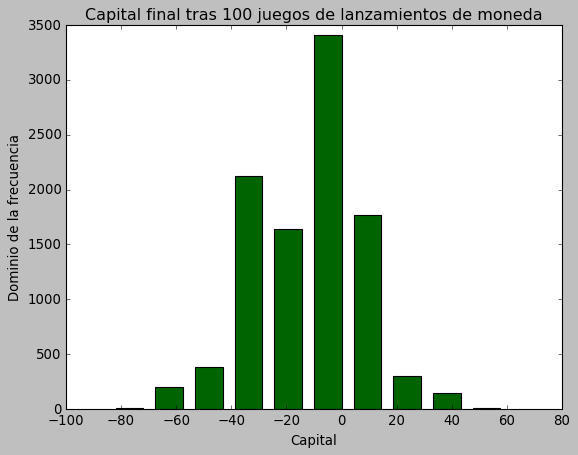

In [164]:
plt.title("Capital final tras 100 juegos de lanzamientos de moneda")
plt.xlabel('Capital')
plt.ylabel('Dominio de la frecuencia')
plt.hist((z[:n,-1]), width=10, color='darkgreen') #Histograma del últ. valor del arreglo de las simulaciones.

In [165]:
#Probabilidad de valores únicos del df obtenido del anterior histograma.
sim_capital_30=(df_juegomoneda.iloc[:,-1:].value_counts()/n)*100
sim_capital_30
#Puede ser útil observar la probabilidad en orden descendente

100  
-10.0    18.25
-19.0    16.42
-1.0     15.82
-28.0    13.42
 8.0     11.00
-37.0     7.85
 17.0     6.66
-46.0     3.86
 26.0     3.04
-55.0     1.55
 35.0     1.12
-64.0     0.46
 44.0     0.31
-73.0     0.11
 53.0     0.09
-82.0     0.02
 62.0     0.02
dtype: float64

**(Respuesta 1.3.3: Prob. de ganar dinero.)**

In [166]:
#Todos aquellos que terminan con más de $0 sobre la muestra.
print('La prob. de ganar dinero al final de estos 100 lanzamientos de moneda es de:',((len(z[:n,-1][z[:n,-1]>0])/10000)*100),'%.')

La prob. de ganar dinero al final de estos 100 lanzamientos de moneda es de: 22.24 %.


4. Imagina que **comienzas con $\$30$** ¿Cuál es el **valor esperado del número de  tiradas** que debes realizar **antes de quedarte sin dinero?** ¿Cuál es la **probabilidad de realizar más de 150 tiradas?** (grafica el **histograma** correspondiente).

In [167]:
n=10000 #n simulaciones
capital_30=juego_moneda(30,1,150,8,0) #Número de juegos deseado +1
z_30 = np.array([juego_moneda(30,1,150,8,0) for i in range(n)]) #Simulaciones de x juegos

In [168]:
bool_array = (z_30[:n,-1]>=1)
count = np.count_nonzero(bool_array)
print('La prob. de poder realizar más de 150 tiradas empezando con $30, es igual a:',(count/n)*100,'%')

La prob. de poder realizar más de 150 tiradas empezando con $30, es igual a: 66.71000000000001 %


(array([  10.,   83.,  510., 1522., 2669., 2822., 1662.,  580.,  128.,
          14.]),
 array([-74., -56., -38., -20.,  -2.,  16.,  34.,  52.,  70.,  88., 106.]),
 <BarContainer object of 10 artists>)

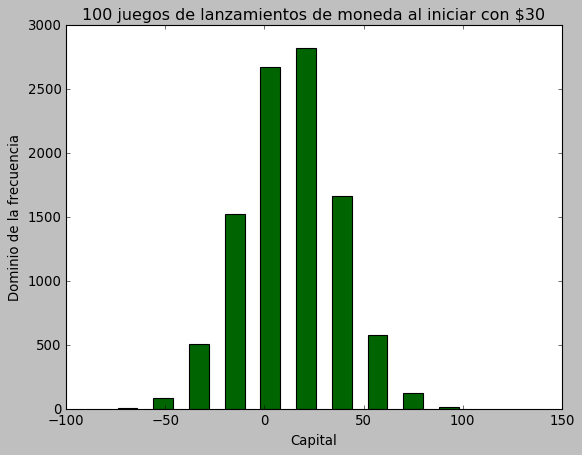

In [169]:
#Pareciera un histograma de un juego justo si se iniciará con $0..
plt.title("100 juegos de lanzamientos de moneda al iniciar con $30")
plt.xlabel('Capital')
plt.ylabel('Dominio de la frecuencia')
plt.hist((z_30[:n,-1]), width=10, color='darkgreen')

## 2. (5 puntos)
El juego de dados requiere que el jugador **arroje dos dados una o más veces hasta que** se llegue a una decisión sobre si él (o ella) **gana o pierde**. Él **gana** si la **primera tirada** resulta en una suma de **7 u 11 o**, alternativamente, **si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7**. Por el contrario, **pierde si la primera tirada resulta en una suma de 2, 3 o 12 o**, alternativamente, **si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7** *después de la primera suma reaparece*.
1. Calcule la **probabilidad de ganar** corriendo **10,000 simulaciones**.

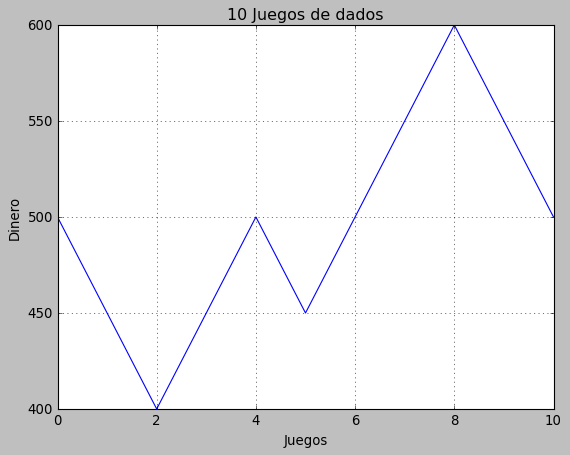

In [170]:
def juego_dados(cap_inicial, apuesta, n_dados):
    #np.random.seed(102) #Fijación de resultados deshabilitada
    dado_1 = np.random.randint(1,7,n_dados) #Creación de 1° dado tirado n_dados veces
    dado_2 = np.random.randint(1,7,n_dados) #creación de 2° dado tirado n_dados veces
    suma = dado_1+dado_2 #Suma de dados para n_dados tiradas
    capital = np.zeros(n_dados) #Vector de ceros para su llenado
    capital[0] = cap_inicial #capital inicial
    
    def fill_vector(i):
        nonlocal capital #Comando para trabajar con variables no internas en funciones anidadas
        if suma[i] == 7 or suma[i] == 11: 
            capital[i + 1] = capital[i] + apuesta #Evento ganador en 1° lanzamiento
        elif suma[i] == 2 or suma[i] == 3 or suma[i] == 12:
            capital[i + 1] = capital[i] - apuesta #Evento perdedor en 1° lanzamiento
        else:
            dado_1_r = np.random.randint(1,7,n_dados) #De lo contrario tira de nuevo..
            dado_2_r = np.random.randint(1,7,n_dados) 
            suma_r = dado_1_r+dado_2_r 
            while suma_r[i] != suma[i] and suma_r[i] != 7: #Mientras la nueva suma sea distinta a la 1° o distinta a 7
                dado_1_r = np.random.randint(1,7,n_dados)  #tira de nuevo..
                dado_2_r = np.random.randint(1,7,n_dados) 
                suma_r = dado_1_r+dado_2_r 
            if suma_r[i] == 7: 
                capital[i + 1] = capital[i] - apuesta #Si la nueva suma es 7, pierdes..
            else:
                capital[i + 1] = capital[i] + apuesta #Si la nueva suma es igual a la 1° obtenida, ganas..
    [fill_vector(i) for i in range(n_dados - 1)] #llenado de vector 
    return capital

n=10000 #n simulaciones 
prob_ganar1 = juego_dados(0,1,n)
ganar=((n/2)+prob_ganar1[-1])/n
perder=1-ganar
dinero = juego_dados(500,50,11) #Capital inicial de 500 y apuesta de 50 para 10 juegos
x = np.array([juego_dados(500,50,11) for i in range(n)])

plt.style.use('classic')    
plt.plot(dinero) #Comportamiento gráfico
plt.title('10 Juegos de dados')
plt.xlabel('Juegos')
plt.ylabel('Dinero')
plt.grid()
plt.show()

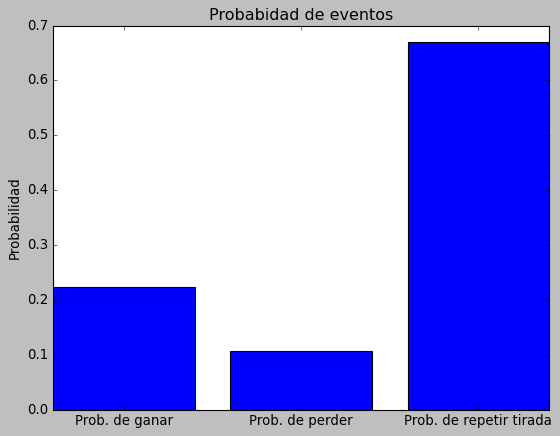

In [171]:
#np.random.seed(102) #Fijación de resultados deshabilitada
n = 10000 #Número de simulaciones
dado_1 = np.random.randint(1,7,n) #Creación de 1° dado tirado n veces
dado_2 = np.random.randint(1,7,n) #creación de 2° dado tirado n veces
suma = dado_1+dado_2 #Suma de dados para n tiradas
#Compresión de listas
gana = [len(suma[suma == gana])/len(suma) for gana in [7,11]] #Prob. de ocurrencia de elementos que componen el evento ganador.
g=gana[0]+gana[1]
pierde = [len(suma[suma == pierde])/len(suma) for pierde in [2,3,12]] # **.. el evento perdedor.
p=pierde[0]+pierde[1]+pierde[2]
repite = [len(suma[suma == repite])/len(suma) for repite in [4,5,6,8,9,10]] # **.. el evento que tira de nuevo.
r=sum([repite[i] for i in range(0,6)])

#Histograma de probabilidades
plt.style.use('classic')
plt.title('Probabidad de eventos')
plt.bar(['Prob. de ganar', 'Prob. de perder', 'Prob. de repetir tirada'], [g,p,r])
plt.ylabel('Probabilidad')
plt.show()

In [172]:
#DESCRIPCION DEL JUEGO (curiosidad)
print('Aunque la prob. de ganar en el 1° lanzamiento =', g*100,'% es > a la de perder =',round(p*100,2),
      '%, debido a las',round(r*n,2),'veces que se repite el lanzamiento, se gana el juego finalmente con una probabilidad de:'
      ,round(ganar*100,2),'%, prob. < a la que se tiene de perder:',round(perder*100,2),'%')

Aunque la prob. de ganar en el 1° lanzamiento = 22.36 % es > a la de perder = 10.65 %, debido a las 6699.0 veces que se repite el lanzamiento, se gana el juego finalmente con una probabilidad de: 48.91 %, prob. < a la que se tiene de perder: 51.09 %


##### 1. Calcule la **probabilidad de ganar** corriendo **10,000 simulaciones**. (Respuesta)

In [173]:
print('La prob. de ganar con',n,'simulaciones es de',round(ganar*100,2),'%')

La prob. de ganar con 10000 simulaciones es de 48.91 %


2. Imagina que **cada juego ganas o pierdes $50**. Si **inicias con $500**..
##### 2.1 ¿Cuál es tu **valor esperado de dinero después de 10 juegos**?
##### 2.2 ¿**y el más probable**?
##### 2.3 ¿Cuál es la **probabilidad de ganar dinero?**.

##### 2.1 ¿Cuál es tu valor esperado después de 10 juegos? (Respuesta)

In [174]:
print('Tu dinero al final de estos 10 juegos de dados fue de: $',dinero[-1], 'aunque el valor esperado de 10 juegos',\
      'calculado con:',n,'simulaciones es de $',sum(x[:n,-1])/n,'lo que implica un cambio % de capital esperado de',
      (((sum(x[:n,-1]/n)/x[0,0])-1)*100).round(2),'%, ¿Quieres jugar de nuevo?')

#Cómputo de media..
#media1=([sum(i) for i in zip(*x)][-1])/n #La velocidad de cómputo para ambos es eq.
#media2=sum(x[:n,-1])/n #Pero este es más sencillo
#media2

Tu dinero al final de estos 10 juegos de dados fue de: $ 500.0 aunque el valor esperado de 10 juegos calculado con: 10000 simulaciones es de $ 492.41 lo que implica un cambio % de capital esperado de -1.52 %, ¿Quieres jugar de nuevo?


##### 2.2 ¿Cuál es tu valor esperado más probable después de 10 juegos?

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 array([  15,  110,  485, 1231, 2123, 2495, 1979, 1088,  373,   93,    8],
       dtype=int64))

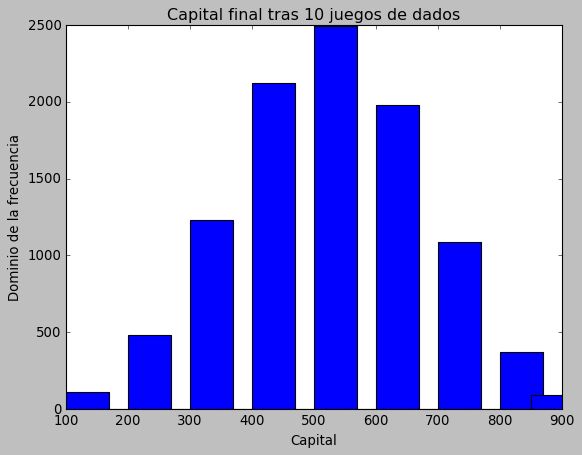

In [52]:
plt.title("Capital final tras 10 juegos de dados")
plt.xlabel('Capital')
plt.ylabel('Dominio de la frecuencia')
plt.hist((x[:n,-1]),bins = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900], width=70)
df_juegodados = pd.DataFrame(x) #df para usar función mode..
cf_prob=df_juegodados.iloc[:,-1:].mode() #df del valor más prob. en el últ. lanzamiento 
val = cf_prob[10].values[0] #valor del capital final más prob.

#Curiosidad..
unique_elements, counts_elements = np.unique(x[:n,-1], return_counts=True) #El capital final para todos los posibles valores
unique_elements, counts_elements #probabilidades respectivas de todos los posibles valores para apreciar el histograma..

##### (Respuesta)

In [53]:
print('Tu capital final más probable después de 10 juegos es de: $', val,
      'y se obtendrá con una prob de:',round(((len(x[:n,-1][x[:n,-1]==500]))/n)*100,2),'%')

Tu capital final más probable después de 10 juegos es de: $ 500.0 y se obtendrá con una prob de: 24.95 %


#### 2.3 ¿Cuál es la probabilidad de ganar dinero?

In [54]:
#Curiosidad..
#Las prob. de los valores esperados en orden descendente son las sig...
(df_juegodados.iloc[:,-1:].value_counts()/n)*100

10    
500.0     24.95
400.0     21.23
600.0     19.79
300.0     12.31
700.0     10.88
200.0      4.85
800.0      3.73
100.0      1.10
900.0      0.93
0.0        0.15
1000.0     0.08
dtype: float64

##### (Respuesta)

In [56]:
print('La prob. de ganar dinero al final de estos 10 juegos de dados es de:',round(((len(x[:n,-1][x[:n,-1]>500])/10000)*100),2),'%.')

La prob. de ganar dinero al final de estos 10 juegos de dados es de: 35.41 %.


## 3. (5 puntos)

Se eligen **tres puntos uniformemente** al azar del perímetro de un círculo unitario. Utilice la simulación de **Monte Carlo** para calcular la **probabilidad de que los puntos formen un triángulo agudo**, ¿cuál es la **probabilidad de generar aleatoriamente triángulos agudos**?

Suponga que **10.000 simulaciones son suficientes para calcular $P$**.

> Ayuda: 
> 1. https://www.universoformulas.com/matematicas/trigonometria/resolucion-triangulos/
> 2. Distancia entre un par de puntos en el eje cartesiano $$d=\sqrt{(x_2-x_1)^2 + (y_2 - y_1)^2}$$
> 3. Coordenadas polares $$x=R\cos (\theta), \quad y=R\sin (\theta)$$
> 4. https://es.wikipedia.org/wiki/Tri%C3%A1ngulos_agudos_y_obtusos

In [57]:
# Solución

# 4. (5 puntos)

Supongamos que estás en un **programa de juegos**, y se le da la **opción de tres puertas**: detrás de **una puerta** hay un **premio valioso**; **Detrás de las otras dos, cabras**. **Usted elige** una puerta, digamos la **No. 1**, y el **anfitrión**, que sabe lo que está detrás de las puertas, abre otra puerta, supongamos la **No. 3**, que tiene una cabra. Luego te dice: "**¿Quieres elegir la puerta No. 2?**" **¿Hay ventaja al cambiar la primera puerta elegida?**. Resuelva este problema **usando montecarlo** y responda a la siquiente pregunta:
* ¿Cuál sería la **probabilidad de ganar el premio valioso si se elige cambiar la primera puerta** elegida?

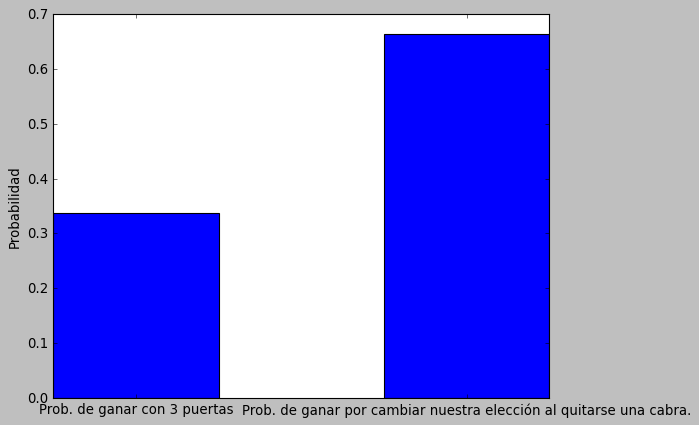

In [58]:
#np.random.seed(44) #Fijación de resultados con semilla deshabilitada
n = 10000 #Número de simulaciones
# Inicializar aciertos con _n puertas
puertas_2 = 0
puertas_3 = 0
#Resultados de abrir las puertas #CREAR LA FUNCION PARA LLAMARLA
for i in range(n):
    puertas = ['cabra', 'premio', 'cabra']
    #Cambiar los resultados
    np.random.shuffle(puertas)
    #Elección aleatoria
    eleccion_3 = np.random.randint(0, 2)
    #Eliminación de una puerta que contiene una cabra
    cabra_X = np.random.choice([i for i in range(len(puertas)) if puertas[i] == 'cabra' and i != eleccion_3])
    puertas_restantes = [0, 1, 2]
    puertas_restantes.remove(eleccion_3) #Eliminación de eleccion con 3 puertas
    puertas_restantes.remove(cabra_X) #Eliminación de cabra
    eleccion_2 = puertas_restantes[0] #Elección resultante al tener 2 puertas
    # Contabilizar aciertos con 3 y 2 puertas tras cambio de elección.
    if puertas[eleccion_3] == 'premio':
        puertas_3 += 1
    elif puertas[eleccion_2] == 'premio':
        puertas_2 += 1
        
# Histograma de probabilidades
plt.style.use('classic')
plt.bar(['Prob. de ganar con 3 puertas', 'Prob. de ganar por cambiar nuestra elección al quitarse una cabra.'],\
        [puertas_3 / n, puertas_2 / n], width=0.5)
plt.ylabel('Probabilidad')
plt.show()

##### (Respuesta)

In [59]:
print('La probabilidad de abrir la puerta que contiene el premio es de:', round((puertas_3 / n)*100,2),'%'\
      '. Sin embargo, si se elimina una puerta que contiene una cabra y se cambia de elección, la nva. prob. de ganar'\
      ' es de:', round((puertas_2 / n)*100,2),'%. Es decir que se tiene ventaja por cambiar de elección. Nota: Estos'\
      ' cálculos fueron hechos con',n,'simulaciones.')

La probabilidad de abrir la puerta que contiene el premio es de: 33.69 %. Sin embargo, si se elimina una puerta que contiene una cabra y se cambia de elección, la nva. prob. de ganar es de: 66.31 %. Es decir que se tiene ventaja por cambiar de elección. Nota: Estos cálculos fueron hechos con 10000 simulaciones.


## Parámetros de entrega

- La **solución** a este primer examen se debe realizar en un notebook de jupyter, utilizando la **sintaxis markdown** y además se deben de **reportar el código** de cómo obtuvieron los resultados de simulación (debidamente comentado y con la programación óptima como hemos venido trabajando), y con los resultados obtenidos **responder a las preguntas dadas.**
- La fecha de entrega de este trabajo es **05/10/2021 hasta las 6 pm** y se debe de entregar a través de canvas, donde habilitaré un espacio para entrega de este Examen. Recuerden después de las 6 pm del martes se deshabilita en Canvas la entrega de la tarea, así que considérenlo para que no vayan a tener inconvenientes. Recuerden lo acordado el primer día de clase.
- **Cada ejercicio tendrá el mismo porcentaje** y el porcentaje del **exámen** será de el **15%**.